<a href="https://colab.research.google.com/github/UmaGhildiyal/Deep_Neural_Networks_YT/blob/main/12_imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling imbalanced dataset in machine learning

## 1. Under Sampling Majority Class

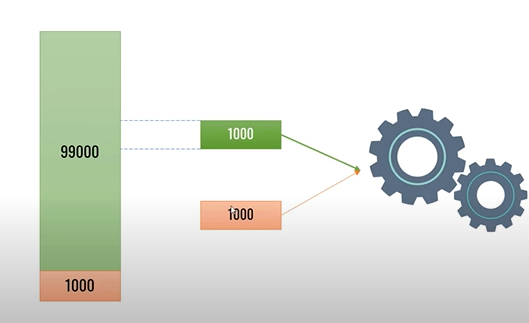

## 2. Over sampling Minority Class by duplication

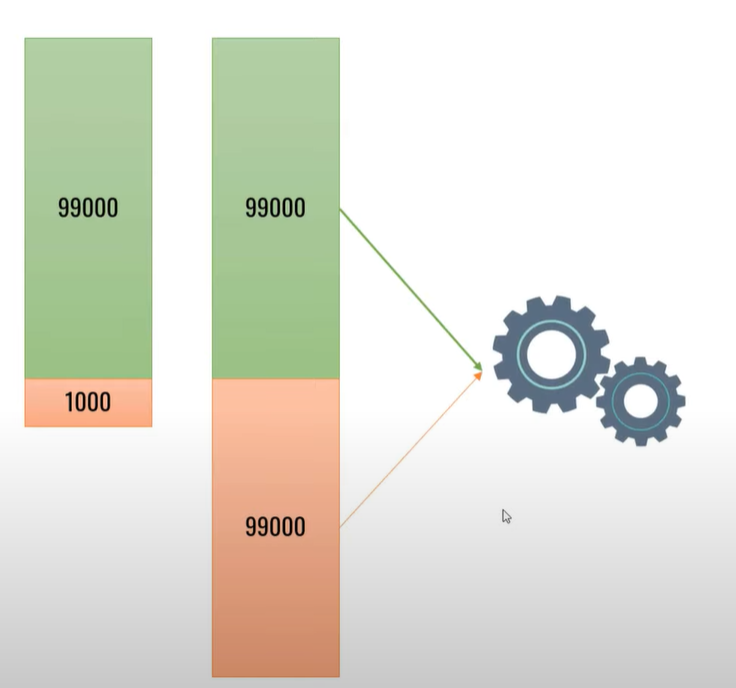




## 3. Over Sampling Using SMOTE


*  KNN algo
*  Synthetic minority Over-Smapling Technique

## 4. Ensemble Method
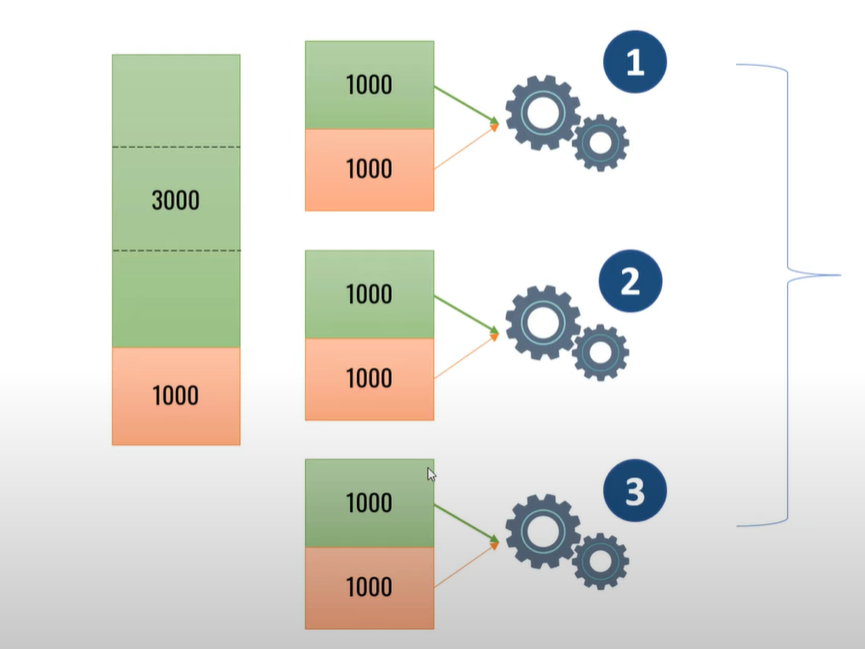

## 5. Focal Loss


*   penelize majority class
*   more weight to minority class



# **Importing Dataset**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5444,1833-TCXKK,Male,0,Yes,No,45,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.75,4882.8,No
5953,6888-SBYAI,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.70,50.7,No
5095,7269-JISCY,Female,0,No,No,55,Yes,No,DSL,No,...,No,No,No,No,One year,No,Bank transfer (automatic),45.05,2462.6,No
589,0795-LAFGP,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,90.40,6668.05,No
4944,3682-YEUWS,Male,0,Yes,Yes,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,24.40,253.9,No


In [ ]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
517400/df.shape[0]

73.46301292063042

**droping customerID as it is of no use**

In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**TotalCharges should be float but it is an object.**

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**it is string ---> convert it to numbers**

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.iloc[488].TotalCharges

' '

In [ ]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [ ]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# **Data Visualization**

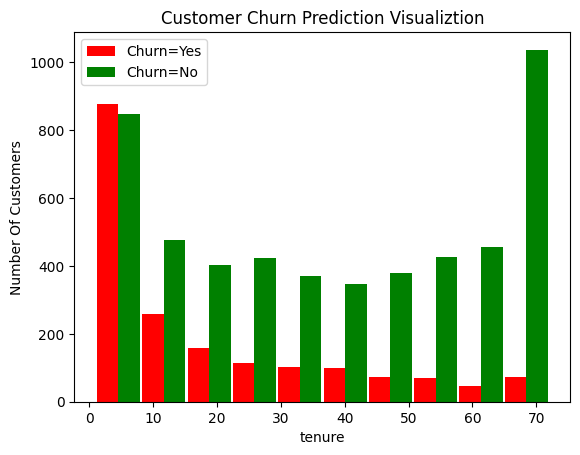

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# ???
# blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
# blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

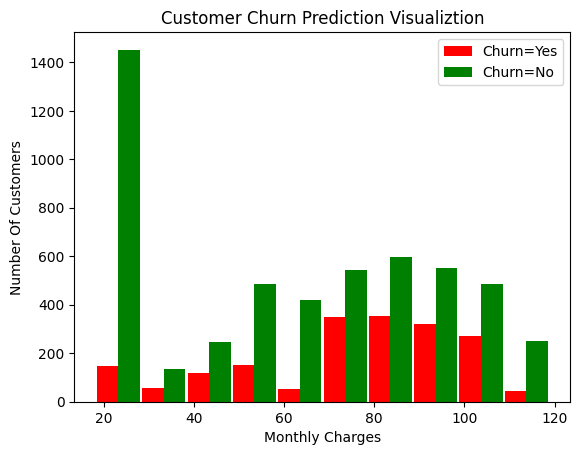

In [ ]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
# blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

# **Data Cleaning**

**Print unique values in object columns to see data values**

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


 **Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.gender.unique()

array([1, 0])

# **One hot encoding for categorical columns**

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4509,1,0,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1512,1,0,1,1,14,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3393,0,0,1,0,62,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
165,0,0,1,0,69,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4777,1,0,0,1,2,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# **Train test split**

In [ ]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [ ]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [ ]:
5163/1869

2.7624398073836276

In [ ]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
len(X_train.columns)

26

# **Building model (ANN) in tensorflow/keras**

In [ ]:
import tensorflow as tf
# from tensorflow_addons import losses
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7124
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7872
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7925
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.7995
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8057
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accura

# **Mitigating Skewdness of Data**

## **Method 1: Undersampling**

In [ ]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [ ]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [63]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under.Churn.astype(np.float32)

# stratify : X_train, X_test will have balanced samples from 0 and 1 class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify = y)

In [64]:
y_train.value_counts()

Churn
0.0    1495
1.0    1495
Name: count, dtype: int64

In [65]:
y_test.value_counts()

Churn
1.0    374
0.0    374
Name: count, dtype: int64

In [66]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6105 - accuracy: 0.6819
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7435
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7562
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7592
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7619
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7635
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7669
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7656
Epoch 11/

---
**Befor undersampling:**

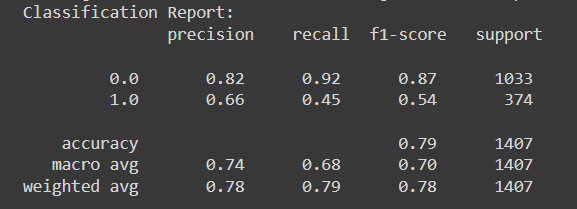

---



## **Method 2: Oversampling**

In [68]:
count_class_0, count_class_1

(5163, 1869)

oversampling class 1 as it has less samples

In [72]:
df_class_1.sample(count_class_0, replace=True).shape

(5163, 27)

In [79]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(f"Shape df_test_over: {df_test_over.shape}\n")
print('Random over sampling:')
print(df_test_over.Churn.value_counts())

Shape df_test_over: (10326, 27)

Random over sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [80]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over.Churn.astype(np.float32)

# stratify : X_train, X_test will have balanced samples from 0 and 1 class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify = y)

In [81]:
y_train.value_counts()

Churn
1.0    4130
0.0    4130
Name: count, dtype: int64

In [82]:
y_test.value_counts()

Churn
1.0    1033
0.0    1033
Name: count, dtype: int64

In [83]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.7413
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4861 - accuracy: 0.7682
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.7676
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7703
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7738
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7753
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4648 - accuracy: 0.7787
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7791
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.7780
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4580 - accura

---
**Befor oversampling:**

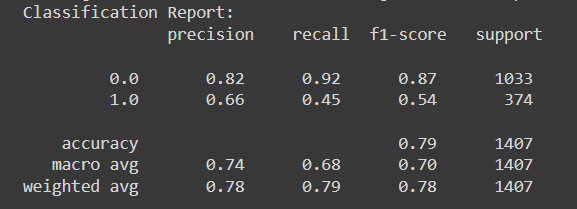

---



**On Undersampling**


---

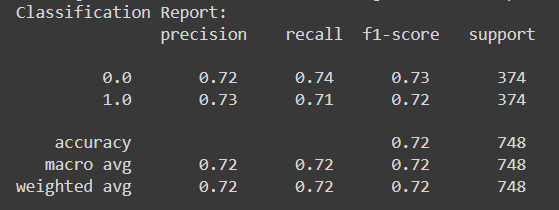

---

## **Method 3: SMOTE**

In [88]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

In [89]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [90]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0.0    5163
1.0    5163
Name: count, dtype: int64

In [91]:
# stratify : X_train, X_test will have balanced samples from 0 and 1 class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify = y_sm)

In [92]:
y_train.value_counts()

Churn
1.0    4130
0.0    4130
Name: count, dtype: int64

In [93]:
y_test.value_counts()

Churn
1.0    1033
0.0    1033
Name: count, dtype: int64

In [95]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7437
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7764
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4588 - accuracy: 0.7789
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7837
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.7866
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.7883
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.7919
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7935
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.7949
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4326 - accura

## **Method 4: Use of Ensemble with Undersampling**

In [97]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [98]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [99]:
# stratify : X_train, X_test will have balanced samples from 0 and 1 class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify = y)

In [100]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [104]:
4130/1495
# appx 1:3 ratio
# 0 class ---> devide into 3 parts

2.762541806020067

In [105]:
4130/3

1376.6666666666667

In [109]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [110]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [111]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [112]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [115]:
df3_class0[:1495].shape

(1495, 27)

In [121]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Churn', axis='columns')
  y_train = df_train['Churn']

  return X_train, y_train

In [123]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6230 - accuracy: 0.6686
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7649
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7719
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7716
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7736
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7729
Epoch 11/

In [124]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.6629
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7445
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7702
Epoch 11/

In [125]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6050 - accuracy: 0.6960
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7651
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7727
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7769
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7784
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7795
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7746
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7810
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7825
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7833
Epoch 11/

In [128]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [129]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.78      0.58       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407



SMOTE worked best here